<a href="https://colab.research.google.com/github/DataGF/machine-learning/blob/master/digitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification



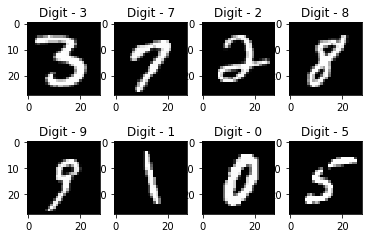

# Setep 1 - Defining a Multiclass Classification Problem (more than 2 classes)

We'll make handwritten digit predictions in the mnist dataset. This is an example of multiclass classification, as our model will have to predict one out of 10 possible outputs for each record (digits 0 to 9).

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

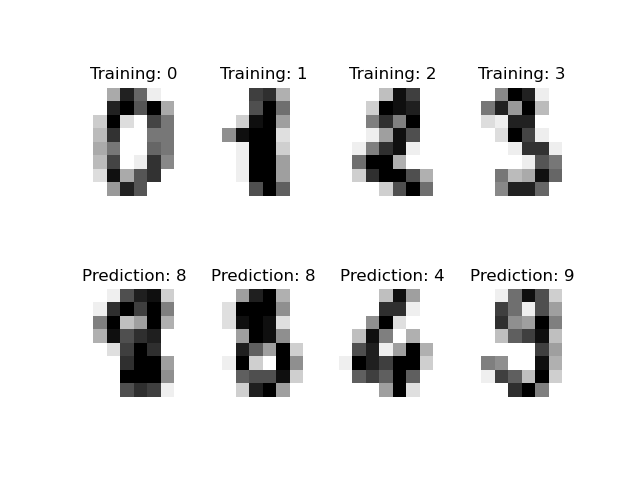

In [1]:
# 28-pixel black scale images ranging from 0-255
from IPython.display import Image
Image('https://i.imgur.com/AcZ5BtH.png')

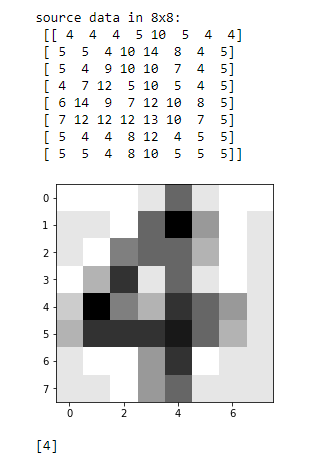

In [2]:
# We'll transform the 8x8 pixel matrix into a vector - See example below
# Each item in this vector is an explanatory variable, a model input variable
from IPython.display import Image
Image('https://i.imgur.com/Tjffxjm.png')

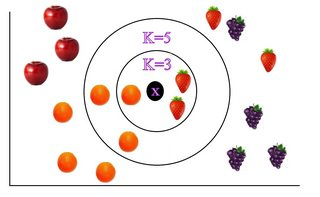

In [3]:
# We'll use the k-nearest neighbors technique to make our predictions
from IPython.display import Image
Image('https://i.imgur.com/mEMQNbYm.jpg')

# Step 2 - Loading and Exploring the Dataset

In [4]:
# Load the packages
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset and view the data
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
# Dataset description
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [7]:
# Dataset target names
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

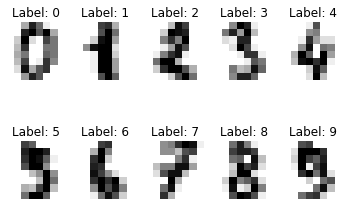

In [8]:
# Viewing some images and labels
images_e_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_e_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [9]:
# Generates X and Y
X = digits.data
Y = digits.target

In [10]:
# X and Y format
# Each of the lines represents the 1-digit Pixels
print(X.shape, Y.shape)

(1797, 64) (1797,)


# Step 3 - Pre-Processing and Standardization

In [11]:
# Division into training and testing data
X_train, testData, Y_train, testLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

Important: we will make validations during the training.

In [12]:
# Division of training data into training data and validation data
trainingData, validationData, trainingLabels, validationLabels = train_test_split(X_train, 
                                                                    Y_train, 
                                                                    test_size = 0.1, 
                                                                    random_state = 84)

In [13]:
# Printing the number of observations in each dataset
print("Training data: {}".format(len(trainingLabels)))
print("Validation data: {}".format(len(validationLabels)))
print("Testing data: {}".format(len(testData)))

Training data: 1131
Validation data: 126
Testing data: 540


In [14]:
# Normalization of data by the Average (it is not the only way to do it. This is a Proposal only)

# Calculate the average of the training dataset - Calculate the average of the X input values
# In this case, we will normalize only the X input variables. There are cases in which it is necessary to normalize Target "Y".
X_norm = np.mean(X, axis = 0)

# Normalization of training and testing data
X_train_norm = trainingData - X_norm
X_valid_norm = validationData - X_norm
X_test_norm = testData - X_norm

In [15]:
# Datasets shape
print(X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

(1131, 64) (126, 64) (540, 64)


# Step 4 - Building the Predictive Machine



#### Testing the Best K Value - Training Validation Stage

In [16]:
# Range of k values ​​that we will test
# Use odd values ​​to avoid a tie in voting for the K value
kValues = range(1, 30, 2)

In [17]:
# Accuracy list variable definition
accuracy_list  = []

In [18]:
# Loop all k values ​​to test each one
for k in kValues:
    
    # Training the KNN model with each k value
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(trainingData, trainingLabels)
          
    # Validation - Assessing the model and updating the accuracy list during training
    score = modeloKNN.score(validationData, validationLabels)
    print("The accuracy of k = %d is equals to %.2f%%" % (k, score * 100))
    accuracy_list.append(score)

The accuracy of k = 1 is equals to 99.21%
The accuracy of k = 3 is equals to 100.00%
The accuracy of k = 5 is equals to 100.00%
The accuracy of k = 7 is equals to 99.21%
The accuracy of k = 9 is equals to 98.41%
The accuracy of k = 11 is equals to 98.41%
The accuracy of k = 13 is equals to 97.62%
The accuracy of k = 15 is equals to 97.62%
The accuracy of k = 17 is equals to 97.62%
The accuracy of k = 19 is equals to 97.62%
The accuracy of k = 21 is equals to 97.62%
The accuracy of k = 23 is equals to 97.62%
The accuracy of k = 25 is equals to 96.83%
The accuracy of k = 27 is equals to 96.83%
The accuracy of k = 29 is equals to 96.83%


In [19]:
# We can stop training at k = 7
# Obtaining the k value that presents the greatest accuracy
i = np.argmax(accuracy_list)
print("The k = %d value reached %d of accuracy, the biggest one." % (kValues[i], accuracy_list[i] * 100))

The k = 3 value reached 100 of accuracy, the biggest one.


#### Machine Construction and Training with KNN

In [20]:
# Creating the final version of the model with the best k value
finalModel = KNeighborsClassifier(n_neighbors = kValues[i])

In [21]:
# Model training
finalModel.fit(trainingData, trainingLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Important: you can change the hyperparameters. Try change the metric='minkowski' to metric='euclidean' for example.

# Step 5 - Predictive Machine Evaluation - Predictions with Testing Data

In [22]:
# Predictions with Testing Data
predictions = finalModel.predict(testData)

In [23]:
# Model performance on testing data
print("Model performance on testing data: \n")
print(classification_report(testLabels, predictions))

Model performance on testing data: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      1.00      0.99        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.98      1.00      0.99        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [24]:
# Final Model Confusion Matrix
print ("Final model confusion matrix: \n")
print(confusion_matrix(testLabels, predictions))

Final model confusion matrix: 

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Prediction: 8


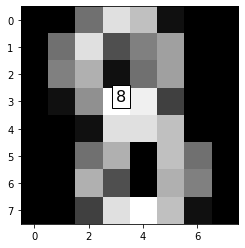

Prediction: 5


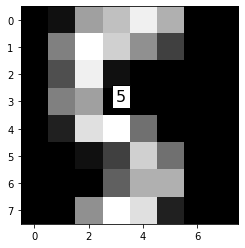

Prediction: 7


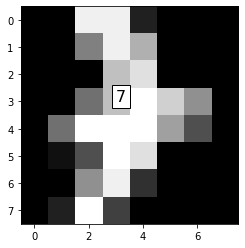

Prediction: 9


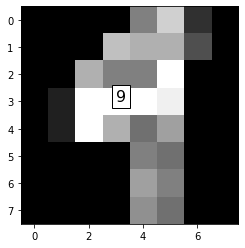

Prediction: 9


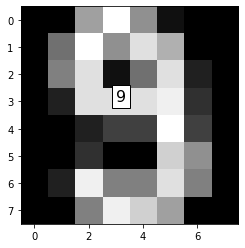

Prediction: 7


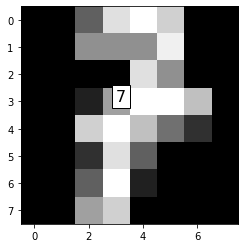

In [26]:
# Predictions with the trained model using test data using 6 randomic values
for i in np.random.randint(0, high=len(testLabels), size=(6,)):
         
    # Gets an image and predict its value
    image = testData[i]
    prediction = finalModel.predict([image])[0]
         
    # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("Prediction: {}".format(prediction))
    plt.show()

# Step 6 - New Data Forecasts with the Trained Model

In [27]:
# Defining a new digit (input data), it is a set of 64 pixels
newDigit = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
            0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
            6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
            0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
            9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [28]:
# Normalizing the ninth digit
newDigit_norm = newDigit - X_norm

In [29]:
# Trained model prediction
newPrediction = finalModel.predict([newDigit_norm])

New prediction: [6]


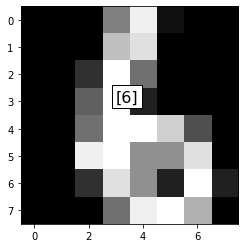

In [30]:
# Model prediction
imgdata = np.array(newDigit, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(newPrediction,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("New prediction: {}".format(newPrediction))
plt.show()

In [31]:
# Defining a new digit 2 (input data), it is a set of 64 pixels
newDigit2 = [0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

In [32]:
# Normalizing the new digit 2
newDigit2_norm = newDigit2 - X_norm

In [33]:
# Trained model prediction 2
newPrediction2 = finalModel.predict([newDigit2_norm])

New prediction 2: [1]


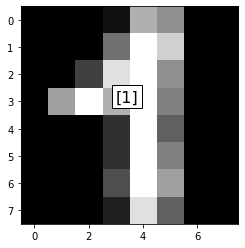

In [34]:
# Model prediction 2
imgdata = np.array(newDigit2, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(newPrediction2,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("New prediction 2: {}".format(newPrediction2))
plt.show()